# Data Augmentation

## What is Data Augmentation?
- Data augmentation is a technique used to artificially increase the size and diversity of a dataset.
- Instead of collecting new data, we create modified versions of existing images.
- This helps the model generalize better and prevents overfitting.

## Common augmentation techniques:
- Rotation
- Flipping (horizontal/vertical)
- Zooming
- Shifting (width, height)
- Brightness/contrast changes
- Adding noise

## Why use it?
- Deep Learning models need **lots of data**.
- Augmentation provides variety and improves model robustness.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


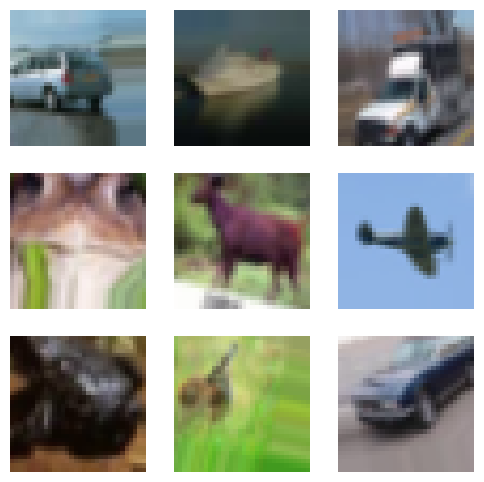

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,      # rotate images up to 20 degrees
    width_shift_range=0.2,  # shift images horizontally
    height_shift_range=0.2, # shift images vertically
    zoom_range=0.2,         # zoom in/out
    horizontal_flip=True    # flip images horizontally
)

# Example with CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Fit the generator on data
datagen.fit(x_train)

# Show some augmented images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9):
    plt.figure(figsize=(6,6))
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(x_batch[i])
        plt.axis("off")
    plt.show()
    break

# Transfer Learning

## What is Transfer Learning?
- Instead of training a CNN from scratch, we use a **pre-trained model** (trained on a large dataset like ImageNet).
- We then **reuse the learned features** (edges, shapes, textures) and fine-tune the model for our dataset.

## Why use Transfer Learning?
- Saves training time.
- Requires less data.
- Provides better accuracy with small datasets.

## Common Pre-trained Models:
- VGG16, VGG19
- ResNet50
- InceptionV3
- MobileNet, EfficientNet

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [7]:
# Load pre-trained MobileNetV2 without top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Freeze base model layers
base_model.trainable = False

# Build new model on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),   # reduce dimensions
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

model.summary()

/tmp/ipython-input-1059739872.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32,32,3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,618 (8.93 MB)

 Trainable params: 82,634 (322.79 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 0.2259 - loss: 2.1188 - val_accuracy: 0.3116 - val_loss: 1.9051
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.3064 - loss: 1.9114 - val_accuracy: 0.3223 - val_loss: 1.8723
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step - accuracy: 0.3204 - loss: 1.8694 - val_accuracy: 0.3293 - val_loss: 1.8507
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 63ms/step - accuracy: 0.3224 - loss: 1.8573 - val_accuracy: 0.3324 - val_loss: 1.8405
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.3287 - loss: 1.8469 - val_accuracy: 0.3361 - val_loss: 1.8317


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 - 9s - 29ms/step - accuracy: 0.3361 - loss: 1.8317
Test Accuracy: 33.61%


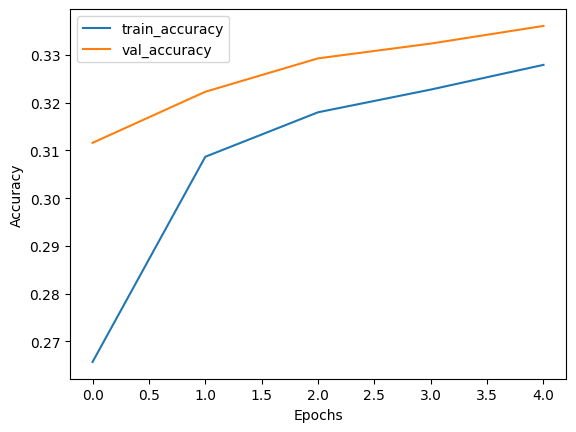

In [11]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


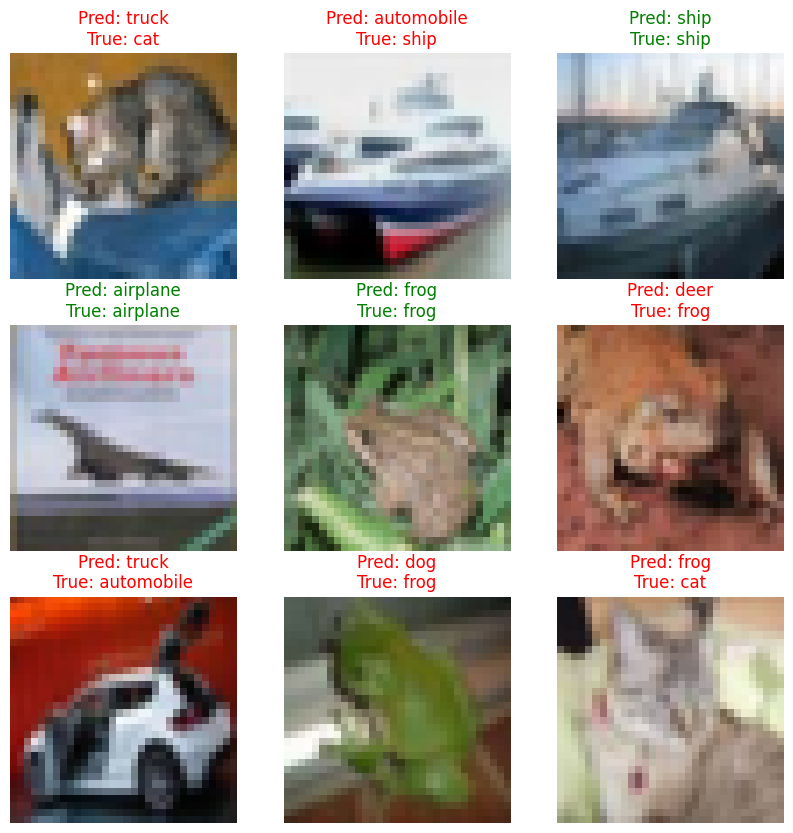

In [13]:
import numpy as np
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Predict first 9 test images
predictions = model.predict(x_test[:9])

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i])

    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i][0]]

    color = "green" if pred_label == true_label else "red"
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis("off")
plt.show()